# California Housing Dataset Analysis
  
**Selected Variable:** AveRooms (Average number of rooms per household)  
**Target Variable:** MedHouseVal (Median house value)

---

## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, normaltest, linregress, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Step 1: Load the Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

print(f"Dataset shape: {df.shape[0]} observations, {df.shape[1]} variables")
print(f"\nVariables: {', '.join(df.columns.tolist())}")
df.head()

Dataset shape: 20640 observations, 9 variables

Variables: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 2: Select Variable

**Selected Variable:** AveRooms (Average number of rooms per household)


In [3]:
selected_var = 'AveRooms'
print(f"Analyzing: {selected_var}")

Analyzing: AveRooms


## Step 3: Descriptive Statistics

In [4]:
# Basic descriptive statistics
desc_stats = df[selected_var].describe()
print("Basic Descriptive Statistics:")
print(desc_stats)

# Additional statistics
print(f"\nAdditional Statistics:")
print(f"Variance: {df[selected_var].var():.4f}")
print(f"Standard Deviation: {df[selected_var].std():.4f}")
print(f"Skewness: {df[selected_var].skew():.4f}")
print(f"Kurtosis: {df[selected_var].kurtosis():.4f}")
print(f"Range: {df[selected_var].max() - df[selected_var].min():.4f}")
print(f"IQR: {df[selected_var].quantile(0.75) - df[selected_var].quantile(0.25):.4f}")

Basic Descriptive Statistics:
count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

Additional Statistics:
Variance: 6.1215
Standard Deviation: 2.4742
Skewness: 20.6979
Kurtosis: 879.3533
Range: 141.0629
IQR: 1.6117


## Step 4: Histogram (Default Bins)

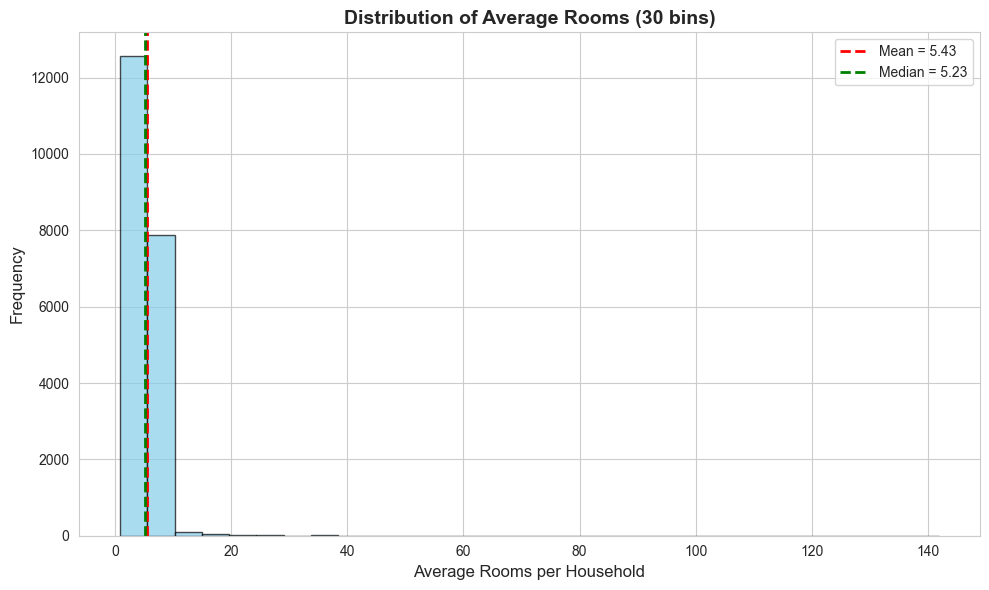

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df[selected_var], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Average Rooms per Household', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Average Rooms (30 bins)', fontsize=14, fontweight='bold')
plt.axvline(df[selected_var].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {df[selected_var].mean():.2f}')
plt.axvline(df[selected_var].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median = {df[selected_var].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

## Step 5: Histogram with More Bins (100 bins)

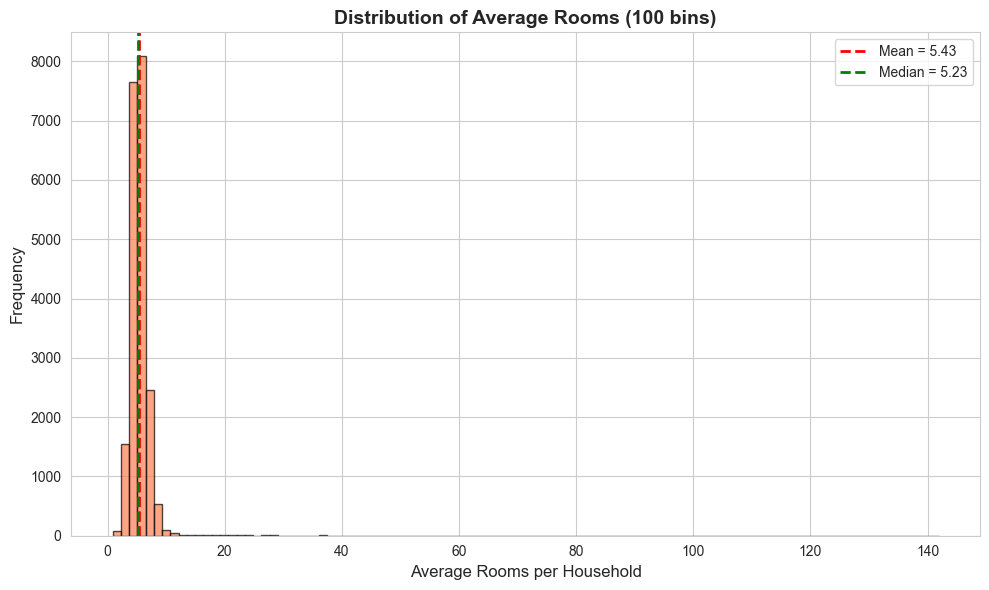

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df[selected_var], bins=100, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Average Rooms per Household', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Average Rooms (100 bins)', fontsize=14, fontweight='bold')
plt.axvline(df[selected_var].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {df[selected_var].mean():.2f}')
plt.axvline(df[selected_var].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median = {df[selected_var].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()



## Step 6: Create Meaningful Categorization

In [9]:
# Examine quartiles
percentiles = df[selected_var].quantile([0.25, 0.5, 0.75])
print("Quartiles:")
print(f"25th percentile: {percentiles[0.25]:.2f}")
print(f"50th percentile (median): {percentiles[0.50]:.2f}")
print(f"75th percentile: {percentiles[0.75]:.2f}")

# Create meaningful categories
def categorize_rooms(rooms):
    if rooms < 4:
        return 'Small (< 4 rooms)'
    elif rooms < 6:
        return 'Medium (4-6 rooms)'
    elif rooms < 8:
        return 'Large (6-8 rooms)'
    else:
        return 'Very Large (> 8 rooms)'

df['RoomCategory'] = df[selected_var].apply(categorize_rooms)

print("\nCategorization scheme:")
print("- Small: < 4 rooms")
print("- Medium: 4-6 rooms")
print("- Large: 6-8 rooms")
print("- Very Large: > 8 rooms")

Quartiles:
25th percentile: 4.44
50th percentile (median): 5.23
75th percentile: 6.05

Categorization scheme:
- Small: < 4 rooms
- Medium: 4-6 rooms
- Large: 6-8 rooms
- Very Large: > 8 rooms


## Step 7: Frequency Table

In [10]:
# Create frequency table
freq_table = df['RoomCategory'].value_counts().sort_index()
freq_table_pct = df['RoomCategory'].value_counts(normalize=True).sort_index() * 100

freq_df = pd.DataFrame({
    'Category': freq_table.index,
    'Frequency': freq_table.values,
    'Percentage': freq_table_pct.values
})

print("Frequency Distribution:")
print(freq_df.to_string(index=False))
print(f"\nTotal observations: {freq_table.sum()}")

Frequency Distribution:
              Category  Frequency  Percentage
     Large (6-8 rooms)       4702   22.781008
    Medium (4-6 rooms)      12345   59.811047
     Small (< 4 rooms)       2868   13.895349
Very Large (> 8 rooms)        725    3.512597

Total observations: 20640


## Step 8: Pie Chart

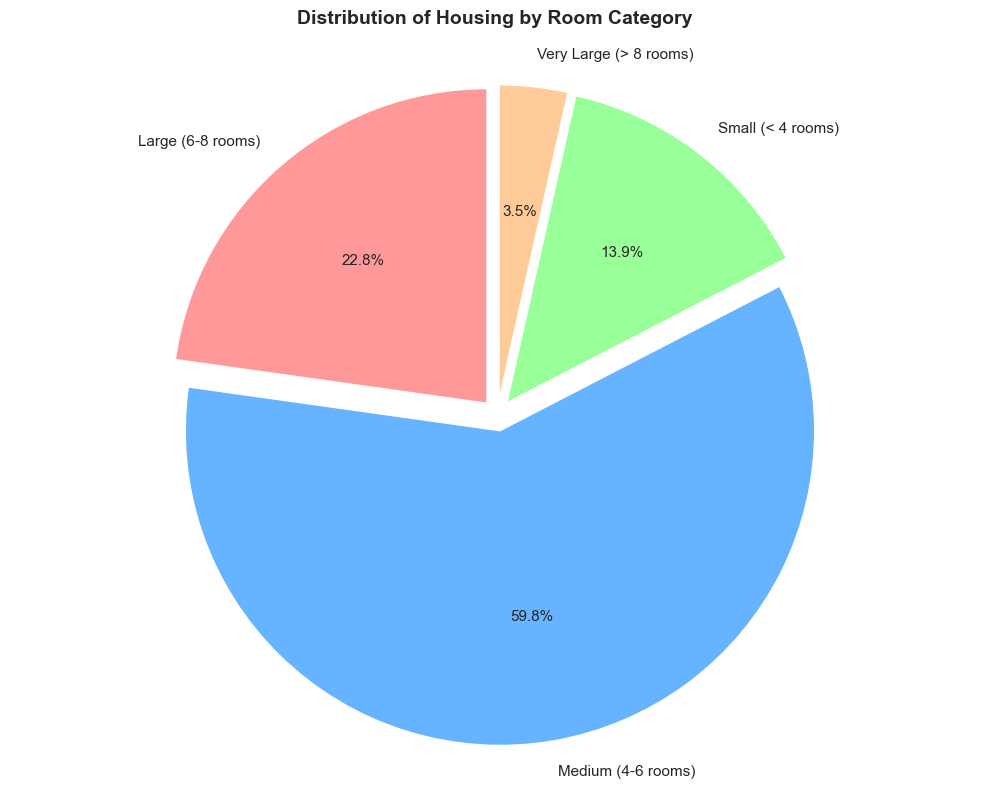

Largest category: 'Medium (4-6 rooms)' with 12345 observations (59.8%)


In [11]:
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(freq_table.values, 
        labels=freq_table.index, 
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={'fontsize': 11})
plt.title('Distribution of Housing by Room Category', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"Largest category: '{freq_table.idxmax()}' with {freq_table.max()} observations ({freq_table_pct.max():.1f}%)")

## Step 9: Logarithmic Transformation

Normality test for original AveRooms:
Test statistic: 46229.2122
P-value: 0.0000
Result: NOT normally distributed (α = 0.05)

Normality test for log-transformed AveRooms:
Test statistic: 5321.8235
P-value: 0.0000
Result: NOT normally distributed (α = 0.05)


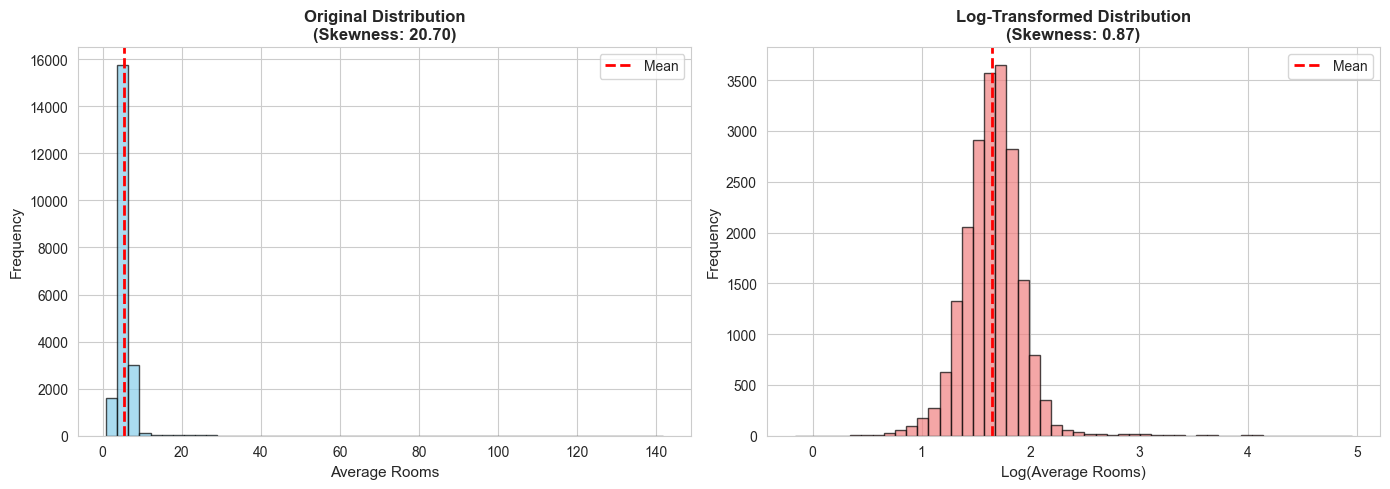


Log transformation improved normality


In [12]:
# Test normality of original variable
stat_original, p_original = normaltest(df[selected_var])
print(f"Normality test for original {selected_var}:")
print(f"Test statistic: {stat_original:.4f}")
print(f"P-value: {p_original:.4f}")
print(f"Result: {'NOT normally distributed' if p_original < 0.05 else 'Approximately normal'} (α = 0.05)")

# Apply log transformation
df['Log_AveRooms'] = np.log(df[selected_var])

# Test normality of transformed variable
stat_log, p_log = normaltest(df['Log_AveRooms'])
print(f"\nNormality test for log-transformed {selected_var}:")
print(f"Test statistic: {stat_log:.4f}")
print(f"P-value: {p_log:.4f}")
print(f"Result: {'NOT normally distributed' if p_log < 0.05 else 'Approximately normal'} (α = 0.05)")

# Visualize both distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original distribution
axes[0].hist(df[selected_var], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Average Rooms', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title(f'Original Distribution\n(Skewness: {df[selected_var].skew():.2f})', 
                  fontsize=12, fontweight='bold')
axes[0].axvline(df[selected_var].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].legend()

# Log-transformed distribution
axes[1].hist(df['Log_AveRooms'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log(Average Rooms)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title(f'Log-Transformed Distribution\n(Skewness: {df["Log_AveRooms"].skew():.2f})', 
                  fontsize=12, fontweight='bold')
axes[1].axvline(df['Log_AveRooms'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nLog transformation {'improved' if abs(df['Log_AveRooms'].skew()) < abs(df[selected_var].skew()) else 'did not improve'} normality")

## Step 10: Relationship Analysis - AveRooms vs MedHouseVal

### 10a: Initial Exploration

In [15]:
target_var = 'MedHouseVal'

print(f"{selected_var} statistics:")
print(df[selected_var].describe())
print(f"\n{target_var} statistics:")
print(df[target_var].describe())

AveRooms statistics:
count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

MedHouseVal statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


### 10b: Outlier Detection and Removal

In [17]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_rooms, lower_rooms, upper_rooms = detect_outliers_iqr(df, selected_var)
outliers_val, lower_val, upper_val = detect_outliers_iqr(df, target_var)

print(f"{selected_var} outliers:")
print(f"Number of outliers: {len(outliers_rooms)}")

print(f"\n{target_var} outliers:")
print(f"Number of outliers: {len(outliers_val)}")

# Remove outliers
df_clean = df[
    (df[selected_var] >= lower_rooms) & (df[selected_var] <= upper_rooms) &
    (df[target_var] >= lower_val) & (df[target_var] <= upper_val)
].copy()

print(f"\nDataset size after outlier removal: {len(df_clean)} ({len(df_clean)/len(df)*100:.2f}% retained)")

AveRooms outliers:
Number of outliers: 511

MedHouseVal outliers:
Number of outliers: 1071

Dataset size after outlier removal: 19176 (92.91% retained)


### 10c: Variable Transformation

In [18]:
df_clean['Log_AveRooms'] = np.log(df_clean[selected_var])
df_clean['Log_MedHouseVal'] = np.log(df_clean[target_var])

print("Variables transformed using natural logarithm")

Variables transformed using natural logarithm


### 10d: Graphical Analysis

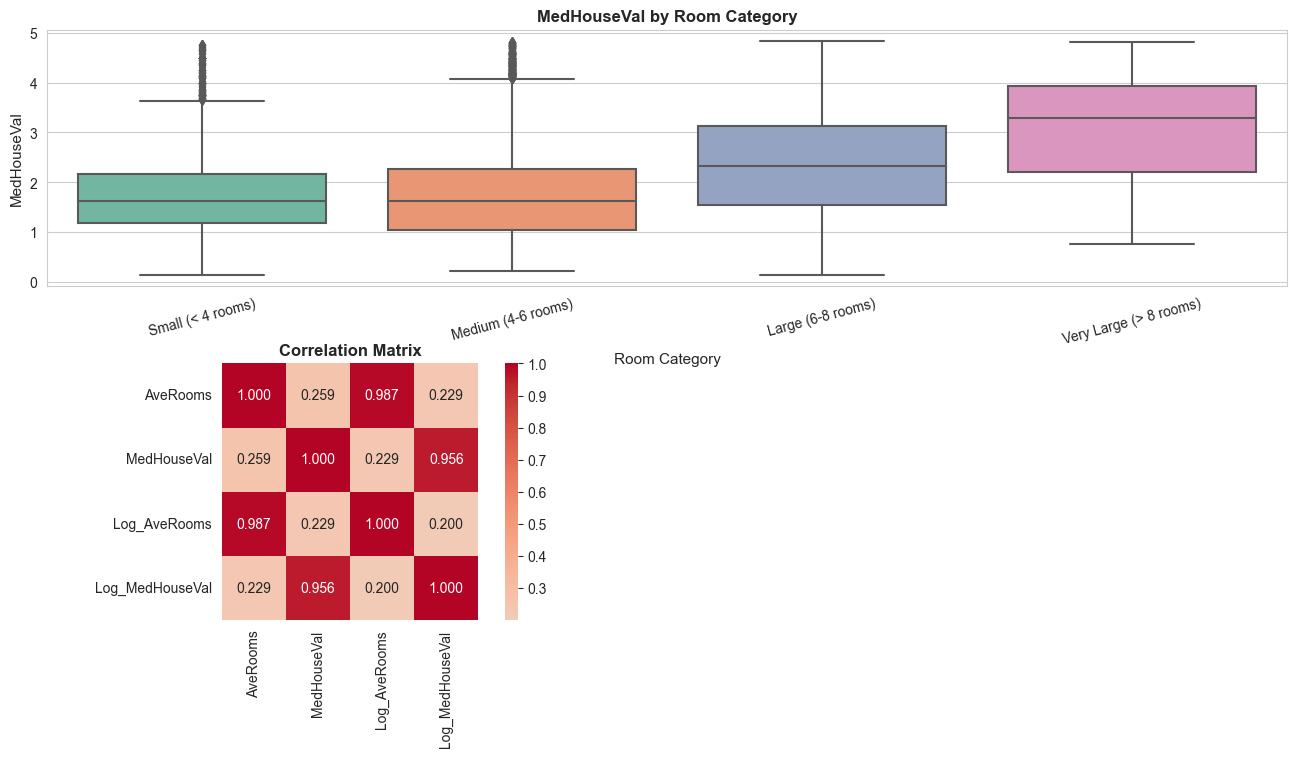

In [24]:
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)


# Box plots by category
ax3 = fig.add_subplot(gs[1, :])
df_clean['RoomCategory'] = df_clean[selected_var].apply(categorize_rooms)
category_order = ['Small (< 4 rooms)', 'Medium (4-6 rooms)', 'Large (6-8 rooms)', 'Very Large (> 8 rooms)']
sns.boxplot(data=df_clean, x='RoomCategory', y=target_var, order=category_order, palette='Set2', ax=ax3)
ax3.set_xlabel('Room Category', fontsize=11)
ax3.set_ylabel(target_var, fontsize=11)
ax3.set_title(f'{target_var} by Room Category', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=15)

# Correlation heatmap
ax4 = fig.add_subplot(gs[2, 0])
corr_matrix = df_clean[[selected_var, target_var, 'Log_AveRooms', 'Log_MedHouseVal']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, square=True, ax=ax4)
ax4.set_title('Correlation Matrix', fontsize=12, fontweight='bold')



plt.show()

### 10e: Statistical Testing

**Research Question:** Do houses with different numbers of rooms (Small, Medium, Large, Very Large) have significantly different median house values?
**Null Hypothesis (H₀):** All room categories have the same mean house value
##### - μ_Small = μ_Medium = μ_Large = μ_Very Large
#### *Alternative Hypothesis (H₁):* At least one category has a different mean house value

In [30]:
# ANOVA by category

from scipy.stats import f_oneway, levene, shapiro
categories = df_clean['RoomCategory'].unique()
category_groups = [df_clean[df_clean['RoomCategory'] == cat][target_var] 
                   for cat in category_order if cat in categories]

# 1. Normality check
print("-"*80)
for cat in category_order:
    if cat in categories:
        data = df_clean[df_clean['RoomCategory'] == cat][target_var]
        stat, p = shapiro(data)
        result = 'Normal' if p > 0.05 else 'Not Normal'
        print(f"{cat:25s}: W={stat:.4f}, p-value={p:.4f} [{result}]")

# 2. Homogeneity of variance
print("-"*80)
stat_levene, p_levene = levene(*category_groups)
print(f"Test statistic: {stat_levene:.4f}")
print(f"P-value: {p_levene:.4f}")
print(f"Result: Variances are {'EQUAL (assumption met)' if p_levene > 0.05 else 'NOT EQUAL (assumption violated)'}")

# 3. Run ANOVA
print("\nOne-Way ANOVA:")
print("-"*80)
f_stat, p_anova = f_oneway(*category_groups)
print(f"Testing if mean {target_var} differs across room categories")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_anova:.4e}")
print(f"Result: {'SIGNIFICANT' if p_anova < 0.05 else 'NOT SIGNIFICANT'} differences between groups (α = 0.05)")

--------------------------------------------------------------------------------
Small (< 4 rooms)        : W=0.9354, p-value=0.0000 [Not Normal]
Medium (4-6 rooms)       : W=0.9419, p-value=0.0000 [Not Normal]
Large (6-8 rooms)        : W=0.9798, p-value=0.0000 [Not Normal]
Very Large (> 8 rooms)   : W=0.9393, p-value=0.0000 [Not Normal]
--------------------------------------------------------------------------------
Test statistic: 124.5149
P-value: 0.0000
Result: Variances are NOT EQUAL (assumption violated)

One-Way ANOVA:
--------------------------------------------------------------------------------
Testing if mean MedHouseVal differs across room categories
F-statistic: 563.3371
P-value: 0.0000e+00
Result: SIGNIFICANT differences between groups (α = 0.05)
